# Text classification for soha
In this notebook I'm going to train a classifier for sentences.
I will take advantage of three principal python libraries for data science and machine learning tasks.

 - [Numpy](https://numpy.org): The fundamental package for **scientific computing** with Python.
 - [Pandas](https://pandas.pydata.org): An open source **data analysis and manipulation tool**, built on top of the Python programming language.
 - [Matplotlib](https://matplotlib.org) : A comprehensive library for **creating static, animated, and interactive visualizations** in Python.
 

## Setup

importing NumPy, Pandas and Matplotlib libraries.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data

In this notebook, I will use the sentences that was gathered by other students.the data has two column, one for query and one for it's coresponding label.

# 1.1 dataset
the labels contains 5 classes:
- **1**: Label 1: It corresponds to Faculty Education aka. آموزش دانشکده.
- **2**: Label 2: It corresponds to Information Desk aka. میز اطلاعات.
- **3**: Label 3:It corresponds to Site/Library aka. سایت یا کتابخانه.
- **4**: Label 4: It corresponds to Information and Suggestions Box aka. صندوق اطلاعات و پیشنهادات.
- **5**: Label 5: It corresponds to Others aka. سایر.

In [12]:
df = pd.read_csv('datasets/train.csv')
print("Shape of the dataset: {}".format(df.shape))
df.head(5)

Shape of the dataset: (3048, 3)


,id,query,label
0,0,شرایط حذف ترم چیه؟,1
1,1,از کجا می تونم با دکتر وحیدی ارتباط برقرار کنم؟,2
2,2,بوفه برداران تا ساعت چند باز است؟,2
3,3,کمترین تعداد واحد چند عدد است؟,1
4,4,سنگ جامد است,5


In [13]:
df.set_index('id' , inplace = True)

In [14]:
print("Shape of the dataset: {}".format(df.shape))
df.head(5)

Shape of the dataset: (3048, 2)


,query,label
id,,
0,شرایط حذف ترم چیه؟,1
1,از کجا می تونم با دکتر وحیدی ارتباط برقرار کنم؟,2
2,بوفه برداران تا ساعت چند باز است؟,2
3,کمترین تعداد واحد چند عدد است؟,1
4,سنگ جامد است,5


# find insight
finding an insight on data using df.info and then making sure if there is any null value in the dataframe 

In [15]:
# print data information
print('data information')
print(df.info(), '\n')

# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')


data information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3048 entries, 0 to 3047
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   query   3048 non-null   object
 1   label   3048 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 71.4+ KB
None 

missing values stats
query    0
label    0
dtype: int64 



In [16]:
df["query"] = df["query"].astype("string")

In [17]:
grouped_data = df.groupby('label').count()
grouped_data.plot(kind = 'bar')

# 2. Preprocessing/Normalizing/augmentation
Every NLP dataset needs to be cleaned and organized. 

# 2.1 Checking size of each sentence

In [18]:
import hazm
df['word_count'] = df['query'].apply(lambda x : len(hazm.word_tokenize(x)))
df["word_count"] = df["word_count"].astype("int64")

In [19]:
minlen= df['word_count'].min()
maxlen= df['word_count'].max()
print(f'minlen : {minlen} , maxlen : {maxlen}')

minlen : 1 , maxlen : 29


In [20]:
sorted_df = df.groupby('word_count').count()['query']
sorted_df.plot(kind='bar',figsize=(20,10),ylabel = 'frequency')


In [21]:
minn = 1
maxx = 18
df['word_count'] = df['word_count'].apply(lambda x : x if minn < x < maxx else None)
df = df.dropna(subset = ['word_count'])
df

,query,label,word_count
id,,,
0,شرایط حذف ترم چیه؟,1,5.0
1,از کجا می تونم با دکتر وحیدی ارتباط برقرار کنم؟,2,11.0
2,بوفه برداران تا ساعت چند باز است؟,2,8.0
3,کمترین تعداد واحد چند عدد است؟,1,7.0
4,سنگ جامد است,5,3.0
...,...,...,...
3043,چند تا درس میشه حذف کرد,1,6.0
3044,جدید ترین ویرایش کتاب هریس که موجوده چیه؟,3,9.0
3045,شرایط مهمان شدن در دانشکده ما چیست؟,1,8.0


# 2.2 removing duplicate/conflicting data

In [22]:
x0=df.shape
print(f'before removing duplicates and conflicts, dataset shape is : {x0}.')
df.drop_duplicates(inplace=True)
x1=df.shape
print(f'after removing duplicates and before removing conflicts, dataset shape is : {x1}.')
df['query']=df['query'].drop_duplicates()
df.dropna(inplace = True)
x2=df.shape
print(f'after removing duplicates and conflicts, dataset shape is : {x2}.')
print(f'this means {-x1[0]+x0[0]} number of rows of the dataset was duplicated and {-x2[0]+x1[0]} number of rows of the dataset was conflicting that we saved one of each. ')
df

before removing duplicates and conflicts, dataset shape is : (3027, 3).
after removing duplicates and before removing conflicts, dataset shape is : (2898, 3).
after removing duplicates and conflicts, dataset shape is : (2891, 3).
this means 129 number of rows of the dataset was duplicated and 7 number of rows of the dataset was conflicting that we saved one of each. 


,query,label,word_count
id,,,
0,شرایط حذف ترم چیه؟,1,5.0
1,از کجا می تونم با دکتر وحیدی ارتباط برقرار کنم؟,2,11.0
2,بوفه برداران تا ساعت چند باز است؟,2,8.0
3,کمترین تعداد واحد چند عدد است؟,1,7.0
4,سنگ جامد است,5,3.0
...,...,...,...
3043,چند تا درس میشه حذف کرد,1,6.0
3044,جدید ترین ویرایش کتاب هریس که موجوده چیه؟,3,9.0
3045,شرایط مهمان شدن در دانشکده ما چیست؟,1,8.0


# 2.3 Cleaning data
- **1**:Using cleantext.clean to clean the text.
- **2**:Using hazm.normalize to normalize the text.(corrects the spacing between words,converting english numbers to persian numbers,...)
- **3**:Removing possible emojis.


In [23]:
from cleantext import clean
import re
def cleaner(string):
    string = string.strip()
    
    string = clean(string,
        fix_unicode=True,
        to_ascii=False,
        lower=True,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_numbers=False,
        no_digits=False,
        no_currency_symbols=True,
        no_punct=True,
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="0",
        replace_with_currency_symbol="",
    )
    normalizer = hazm.Normalizer()
    string = normalizer.normalize(string)
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u'\U00010000-\U0010ffff'
            u"\u200d"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\u3030"
            u"\ufe0f"
            u"\u2069"
            u"\u2066"
            u"\u200c"
            u"\u2068"
            u"\u2067"
            "]+", flags=re.UNICODE)

    string = emoji_pattern.sub(r'', string)
    string = re.sub("\s+", " ", string)
    return string

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [24]:
df['cleaned_query'] = df['query'].apply(cleaner)
df

,query,label,word_count,cleaned_query
id,,,,
0,شرایط حذف ترم چیه؟,1,5.0,شرایط حذف ترم چیه
1,از کجا می تونم با دکتر وحیدی ارتباط برقرار کنم؟,2,11.0,از کجا میتونم با دکتر وحیدی ارتباط برقرار کنم
2,بوفه برداران تا ساعت چند باز است؟,2,8.0,بوفه برداران تا ساعت چند باز است
3,کمترین تعداد واحد چند عدد است؟,1,7.0,کمترین تعداد واحد چند عدد است
4,سنگ جامد است,5,3.0,سنگ جامد است
...,...,...,...,...
3043,چند تا درس میشه حذف کرد,1,6.0,چند تا درس میشه حذف کرد
3044,جدید ترین ویرایش کتاب هریس که موجوده چیه؟,3,9.0,جدیدترین ویرایش کتاب هریس که موجوده چیه
3045,شرایط مهمان شدن در دانشکده ما چیست؟,1,8.0,شرایط مهمان شدن در دانشکده ما چیست


# 2.4 Augmenting data

# 2.5 Tokenize

In [25]:
tokenizer = hazm.WordTokenizer()
df['tokens'] = df['cleaned_query'].apply(tokenizer.tokenize)
df

,query,label,word_count,cleaned_query,tokens
id,,,,,
0,شرایط حذف ترم چیه؟,1,5.0,شرایط حذف ترم چیه,"[شرایط, حذف, ترم, چیه]"
1,از کجا می تونم با دکتر وحیدی ارتباط برقرار کنم؟,2,11.0,از کجا میتونم با دکتر وحیدی ارتباط برقرار کنم,"[از, کجا, میتونم, با, دکتر, وحیدی, ارتباط, برق..."
2,بوفه برداران تا ساعت چند باز است؟,2,8.0,بوفه برداران تا ساعت چند باز است,"[بوفه, برداران, تا, ساعت, چند, باز, است]"
3,کمترین تعداد واحد چند عدد است؟,1,7.0,کمترین تعداد واحد چند عدد است,"[کمترین, تعداد, واحد, چند, عدد, است]"
4,سنگ جامد است,5,3.0,سنگ جامد است,"[سنگ, جامد, است]"
...,...,...,...,...,...
3043,چند تا درس میشه حذف کرد,1,6.0,چند تا درس میشه حذف کرد,"[چند, تا, درس, میشه, حذف, کرد]"
3044,جدید ترین ویرایش کتاب هریس که موجوده چیه؟,3,9.0,جدیدترین ویرایش کتاب هریس که موجوده چیه,"[جدیدترین, ویرایش, کتاب, هریس, که, موجوده, چیه]"
3045,شرایط مهمان شدن در دانشکده ما چیست؟,1,8.0,شرایط مهمان شدن در دانشکده ما چیست,"[شرایط, مهمان, شدن, در, دانشکده, ما, چیست]"


# 2.6 Removing prepositions and pronouns and some other things

In [26]:
tobedeleted = ['از' , 'را' , 'به' , 'که', 'و' , 'بنابراین' , 'زیرا','چون','ولی','اما','چونکه','در','با','من','تو','او','ما','شما','آنها','ایشون','ایشان','تا']
def remove_pre_pro(words):
    for pre in tobedeleted:
        if pre in words:
            words.remove(pre)
    return words        

In [27]:
from ast import literal_eval
df['tokens'] = df['tokens'].apply(remove_pre_pro)
df

,query,label,word_count,cleaned_query,tokens
id,,,,,
0,شرایط حذف ترم چیه؟,1,5.0,شرایط حذف ترم چیه,"[شرایط, حذف, ترم, چیه]"
1,از کجا می تونم با دکتر وحیدی ارتباط برقرار کنم؟,2,11.0,از کجا میتونم با دکتر وحیدی ارتباط برقرار کنم,"[کجا, میتونم, دکتر, وحیدی, ارتباط, برقرار, کنم]"
2,بوفه برداران تا ساعت چند باز است؟,2,8.0,بوفه برداران تا ساعت چند باز است,"[بوفه, برداران, ساعت, چند, باز, است]"
3,کمترین تعداد واحد چند عدد است؟,1,7.0,کمترین تعداد واحد چند عدد است,"[کمترین, تعداد, واحد, چند, عدد, است]"
4,سنگ جامد است,5,3.0,سنگ جامد است,"[سنگ, جامد, است]"
...,...,...,...,...,...
3043,چند تا درس میشه حذف کرد,1,6.0,چند تا درس میشه حذف کرد,"[چند, درس, میشه, حذف, کرد]"
3044,جدید ترین ویرایش کتاب هریس که موجوده چیه؟,3,9.0,جدیدترین ویرایش کتاب هریس که موجوده چیه,"[جدیدترین, ویرایش, کتاب, هریس, موجوده, چیه]"
3045,شرایط مهمان شدن در دانشکده ما چیست؟,1,8.0,شرایط مهمان شدن در دانشکده ما چیست,"[شرایط, مهمان, شدن, دانشکده, چیست]"


# 2.7 Lemmatization 

In [28]:
def lemmatization(words):
    lemmatizer = hazm.Lemmatizer()
    y = []
    for x in words:
        y.append(lemmatizer.lemmatize(x))
    return y

In [29]:
df['lemmatized_data'] = df ['tokens'].apply(lemmatization)
df

,query,label,word_count,cleaned_query,tokens,lemmatized_data
id,,,,,,
0,شرایط حذف ترم چیه؟,1,5.0,شرایط حذف ترم چیه,"[شرایط, حذف, ترم, چیه]","[شرایط, حذف, تر, چیه]"
1,از کجا می تونم با دکتر وحیدی ارتباط برقرار کنم؟,2,11.0,از کجا میتونم با دکتر وحیدی ارتباط برقرار کنم,"[کجا, میتونم, دکتر, وحیدی, ارتباط, برقرار, کنم]","[کجا, میتونم, دکتر, وحید, ارتباط, برقرار, کرد#کن]"
2,بوفه برداران تا ساعت چند باز است؟,2,8.0,بوفه برداران تا ساعت چند باز است,"[بوفه, برداران, ساعت, چند, باز, است]","[بوفه, بردار, ساعت, چند, باز, #است]"
3,کمترین تعداد واحد چند عدد است؟,1,7.0,کمترین تعداد واحد چند عدد است,"[کمترین, تعداد, واحد, چند, عدد, است]","[کمترین, تعداد, واحد, چند, عدد, #است]"
4,سنگ جامد است,5,3.0,سنگ جامد است,"[سنگ, جامد, است]","[سنگ, جامد, #است]"
...,...,...,...,...,...,...
3043,چند تا درس میشه حذف کرد,1,6.0,چند تا درس میشه حذف کرد,"[چند, درس, میشه, حذف, کرد]","[چند, درس, میشه, حذف, کرد#کن]"
3044,جدید ترین ویرایش کتاب هریس که موجوده چیه؟,3,9.0,جدیدترین ویرایش کتاب هریس که موجوده چیه,"[جدیدترین, ویرایش, کتاب, هریس, موجوده, چیه]","[جدید, ویرایش, کتاب, هریس, موجوده, چیه]"
3045,شرایط مهمان شدن در دانشکده ما چیست؟,1,8.0,شرایط مهمان شدن در دانشکده ما چیست,"[شرایط, مهمان, شدن, دانشکده, چیست]","[شرایط, مهمان, شدن, دانشکده, چیست]"


# 2.8 Augmentaition

In [1]:
import nlpaug.augmenter.word as naw
aug = naw.ContextualWordEmbsAug(model_path='HooshvareLab/bert-fa-base-uncased', action="substitute")

Downloading:   0%|          | 0.00/440 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624M [00:00<?, ?B/s]

# 2.9 Alltogether

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hazm
import nlpaug.augmenter.word as naw
from ast import literal_eval
def lemmatization(words):
    lemmatizer = hazm.Lemmatizer()
    y = []
    for x in words:
        y.append(lemmatizer.lemmatize(x))
    return y
#########################################################################
tobedeleted = ['از' , 'را' , 'به' , 'که' , 'بنابراین' , 'زیرا','چون','ولی','اما','چونکه','در','برای','رو','با','من','تو','او','ما','شما','آنها','ایشون','ایشان','تا','یا', 'و']
def remove_pre_pro(words):
    for pre in tobedeleted:
        if pre in words:
            words.remove(pre)
    return words

import cleantext
import re
def cleaner(string):
    string = string.strip()
    
    string = cleantext.clean(string,
        fix_unicode=True,
        to_ascii=False,
        lower=True,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_numbers=True,
        no_digits=True,
        no_currency_symbols=True,
        no_punct=True,
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="",
        replace_with_currency_symbol="",
    )
    
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u'\U00010000-\U0010ffff'
            u"\u200d"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\u3030"
            u"\ufe0f"
            u"\u2069"
            u"\u2066"
            u"\u200c"
            u"\u2068"
            u"\u2067"
            "]+", flags=re.UNICODE)

    string = emoji_pattern.sub(r'', string)
    string = re.sub("\s+", " ", string)
    normalizer = hazm.Normalizer()
    string = normalizer.normalize(string)
    return string
#######################
def  pprocess_Normalize_augment(df , lem = False , drop_duplicates = True,drop_pre_pro = True,aug=True):
        df['word_count'] = df['query'].apply(lambda x : len(hazm.word_tokenize(x)))
        df["word_count"] = df["word_count"].astype("int64")
        minlen= df['word_count'].min()
        maxlen= df['word_count'].max()
        print(f'minlen : {minlen} , maxlen : {maxlen}')
        sorted_df = df.groupby('word_count').count()['query']
        sorted_df.plot(kind='bar',figsize=(20,10),ylabel = 'frequency')
        minn = 1
        maxx = 18
        if drop_duplicates:
            df['word_count'] = df['word_count'].apply(lambda x : x if minn < x < maxx else None)
            df = df.dropna(subset = ['word_count'])
            x0=df.shape
            print(f'before removing duplicates and conflicts, dataset shape is : {x0}.')
            df.drop_duplicates(inplace=True)
            x1=df.shape
            print(f'after removing duplicates and before removing conflicts, dataset shape is : {x1}.')
            df['query']=df['query'].drop_duplicates()
            df.dropna(inplace = True)
            x2=df.shape
            print(f'after removing duplicates and conflicts, dataset shape is : {x2}.')
            print(f'this means {-x1[0]+x0[0]} number of rows of the dataset was duplicated and {-x2[0]+x1[0]} number of rows of the dataset was conflicting that we saved one of each. ')
        df['cleaned_query'] = df['query'].apply(cleaner)
        if aug:
            aug = naw.ContextualWordEmbsAug(model_path='HooshvareLab/bert-fa-base-uncased', action="substitute")
            df['augmented_data'] = df['cleaned_query'].apply(aug.augment)
        tokenizer = hazm.WordTokenizer()
        df['tokens'] = df['cleaned_query'].apply(tokenizer.tokenize)
        if drop_pre_pro:
            df['tokens'] = df['tokens'].apply(remove_pre_pro)
        if lem:
            df['lemmatized_data'] = df ['tokens'].apply(lemmatization)
        ##augmentin the data
        return df

minlen : 1 , maxlen : 29
before removing duplicates and conflicts, dataset shape is : (3027, 3).
after removing duplicates and before removing conflicts, dataset shape is : (2898, 3).
after removing duplicates and conflicts, dataset shape is : (2891, 3).
this means 129 number of rows of the dataset was duplicated and 7 number of rows of the dataset was conflicting that we saved one of each. 


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,query,label,word_count,cleaned_query,augmented_data,tokens,lemmatized_data
id,,,,,,,
0,شرایط حذف ترم چیه؟,1,5.0,شرایط حذف ترم چیه,امتحانات پیش ترم چیه,"[شرایط, حذف, ترم, چیه]","[شرایط, حذف, تر, چیه]"
1,از کجا می تونم با دکتر وحیدی ارتباط برقرار کنم؟,2,11.0,از کجا می‌تونم با دکتر وحیدی ارتباط برقرار کنم,از اونا میتونم با صدای وحیدی ارتباط برقرار کردن,"[کجا, می‌تونم, دکتر, وحیدی, ارتباط, برقرار, کنم]","[کجا, می‌تونم, دکتر, وحید, ارتباط, برقرار, کرد..."
2,بوفه برداران تا ساعت چند باز است؟,2,8.0,بوفه برداران تا ساعت چند باز است,سایه سرا تا ساعت چند بسته است,"[بوفه, برداران, ساعت, چند, باز, است]","[بوفه, بردار, ساعت, چند, باز, #است]"
3,کمترین تعداد واحد چند عدد است؟,1,7.0,کمترین تعداد واحد چند عدد است,کمترین مطلوبیت واحد چند نرخی است,"[کمترین, تعداد, واحد, چند, عدد, است]","[کمترین, تعداد, واحد, چند, عدد, #است]"
4,سنگ جامد است,5,3.0,سنگ جامد است,سنگ جامد نیز,"[سنگ, جامد, است]","[سنگ, جامد, #است]"
...,...,...,...,...,...,...,...
3043,چند تا درس میشه حذف کرد,1,6.0,چند تا درس میشه حذف کرد,چند تا درس میشه ول کنیم,"[چند, درس, میشه, حذف, کرد]","[چند, درس, میشه, حذف, کرد#کن]"
3044,جدید ترین ویرایش کتاب هریس که موجوده چیه؟,3,9.0,جدید‌ترین ویرایش کتاب هریس که موجوده چیه,این ویرایش دنیا ، که موجوده چیه,"[جدید‌ترین, ویرایش, کتاب, هریس, موجوده, چیه]","[جدید, ویرایش, کتاب, هریس, موجوده, چیه]"
3045,شرایط مهمان شدن در دانشکده ما چیست؟,1,8.0,شرایط مهمان شدن در دانشکده ما چیست,شرایط ساکن شدن در ویلای شما چیست,"[شرایط, مهمان, شدن, دانشکده, چیست]","[شرایط, مهمان, شدن, دانشکده, چیست]"


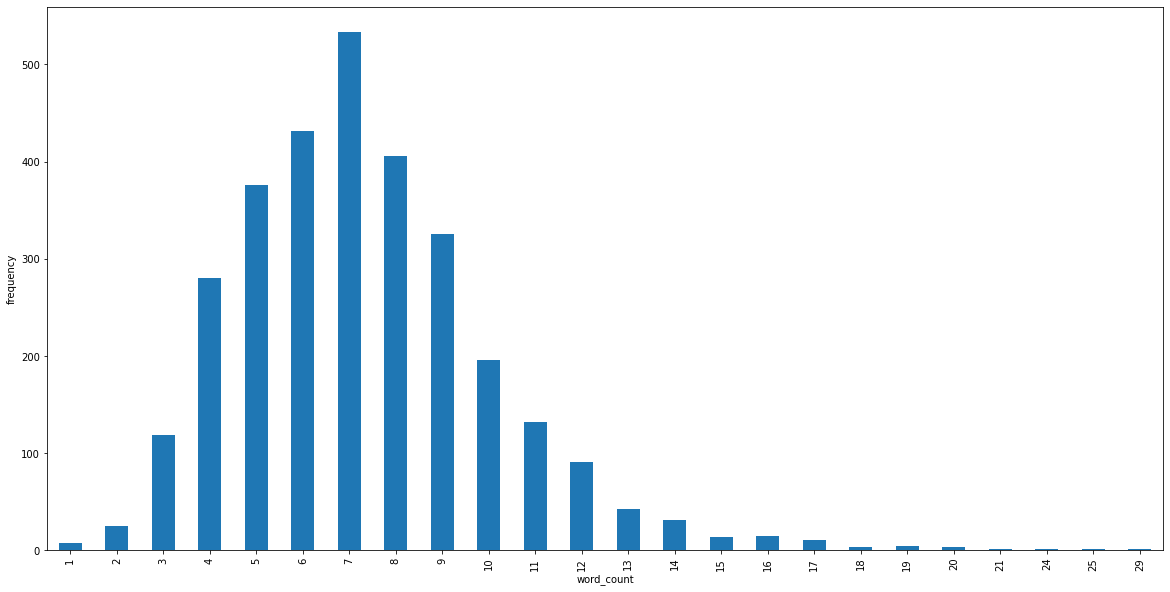

In [5]:
df = pd.read_csv('datasets/train.csv')
df.set_index('id' , inplace = True)
df = pprocess_Normalize_augment(df,lem = True)
df

In [6]:
df.to_csv('train_processed_df.csv')

## 3.Naive bayes
I will do naive bayes once with the tokens and once with lemmatized data 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hazm
from ast import literal_eval
df = pd.read_csv('train_processed_df.csv')
df.set_index('id' , inplace = True)
df['tokens'] = df['tokens'].apply(literal_eval)
df['augmented_data_tokens'] = df['augmented_data'].apply(hazm.word_tokenize)
df['lemmatized_data'] = df['lemmatized_data'].apply(literal_eval)
df.head(20)

,query,label,word_count,cleaned_query,augmented_data,tokens,lemmatized_data,augmented_data_tokens
id,,,,,,,,
0,شرایط حذف ترم چیه؟,1,5.0,شرایط حذف ترم چیه,امتحانات پیش ترم چیه,"[شرایط, حذف, ترم, چیه]","[شرایط, حذف, تر, چیه]","[امتحانات, پیش, ترم, چیه]"
1,از کجا می تونم با دکتر وحیدی ارتباط برقرار کنم؟,2,11.0,از کجا می‌تونم با دکتر وحیدی ارتباط برقرار کنم,از اونا میتونم با صدای وحیدی ارتباط برقرار کردن,"[کجا, می‌تونم, دکتر, وحیدی, ارتباط, برقرار, کنم]","[کجا, می‌تونم, دکتر, وحید, ارتباط, برقرار, کرد...","[از, اونا, میتونم, با, صدای, وحیدی, ارتباط, بر..."
2,بوفه برداران تا ساعت چند باز است؟,2,8.0,بوفه برداران تا ساعت چند باز است,سایه سرا تا ساعت چند بسته است,"[بوفه, برداران, ساعت, چند, باز, است]","[بوفه, بردار, ساعت, چند, باز, #است]","[سایه, سرا, تا, ساعت, چند, بسته_است]"
3,کمترین تعداد واحد چند عدد است؟,1,7.0,کمترین تعداد واحد چند عدد است,کمترین مطلوبیت واحد چند نرخی است,"[کمترین, تعداد, واحد, چند, عدد, است]","[کمترین, تعداد, واحد, چند, عدد, #است]","[کمترین, مطلوبیت, واحد, چند, نرخی, است]"
4,سنگ جامد است,5,3.0,سنگ جامد است,سنگ جامد نیز,"[سنگ, جامد, است]","[سنگ, جامد, #است]","[سنگ, جامد, نیز]"
5,سرورای دانشکده مشکل دارن؟,3,5.0,سرورای دانشکده مشکل دارن,سرورای هم مشکل داشتند,"[سرورای, دانشکده, مشکل, دارن]","[سرورای, دانشکده, مشکل, دارن]","[سرورای, هم, مشکل, داشتند]"
6,کلاس آزمایشگاه فیزیک در دانشکده خودمان برگزار ...,2,12.0,کلاس آزمایشگاه فیزیک در دانشکده خودمان برگزار ...,کلاس اموزش فیزیک در شهر خودمان اداره میگردد یا...,"[کلاس, آزمایشگاه, فیزیک, دانشکده, خودمان, برگز...","[کلاس, آزمایشگاه, فیزیک, دانشکده, خود, برگزار,...","[کلاس, اموزش, فیزیک, در, شهر, خودمان, اداره, م..."
7,شرایط حذف پزشکی چیه؟,1,5.0,شرایط حذف پزشکی چیه,شرایط حذف ، ب,"[شرایط, حذف, پزشکی, چیه]","[شرایط, حذف, پزشک, چیه]","[شرایط, حذف, ،, ب]"
8,در شرایطی ساعت و روز کلاسی جابجا می شود؟,1,10.0,در شرایطی ساعت و روز کلاسی جابجا می‌شود,در نهایت ساعت و عوامل دیگر جابجا میشود,"[شرایطی, ساعت, روز, کلاسی, جابجا, می‌شود]","[شرایط, ساعت, روز, کلاس, جابجا, شد#شو]","[در, نهایت, ساعت, و, عوامل, دیگر, جابجا, میشود]"


In [8]:
data_token = df[['tokens','augmented_data_tokens','label']]
data_lemmatized = df[['lemmatized_data','label']]
data_token

,tokens,augmented_data_tokens,label
id,,,
0,"[شرایط, حذف, ترم, چیه]","[امتحانات, پیش, ترم, چیه]",1
1,"[کجا, می‌تونم, دکتر, وحیدی, ارتباط, برقرار, کنم]","[از, اونا, میتونم, با, صدای, وحیدی, ارتباط, بر...",2
2,"[بوفه, برداران, ساعت, چند, باز, است]","[سایه, سرا, تا, ساعت, چند, بسته_است]",2
3,"[کمترین, تعداد, واحد, چند, عدد, است]","[کمترین, مطلوبیت, واحد, چند, نرخی, است]",1
4,"[سنگ, جامد, است]","[سنگ, جامد, نیز]",5
...,...,...,...
3043,"[چند, درس, میشه, حذف, کرد]","[چند, تا, درس, میشه, ول, کنیم]",1
3044,"[جدید‌ترین, ویرایش, کتاب, هریس, موجوده, چیه]","[این, ویرایش, دنیا, ،, که, موجوده, چیه]",3
3045,"[شرایط, مهمان, شدن, دانشکده, چیست]","[شرایط, ساکن, شدن, در, ویلای, شما, چیست]",1


## 3.1 Class seperation

In [9]:
def separate(data):
    classes = {}
    ids = data['label'].unique()
    for idd in ids:
        classes[idd] = data[data['label'] == idd]
    return classes    

In [10]:
classes_token = separate(data_token) 
classes_lem = separate(data_lemmatized)

# 3.2 Find features and make it ready for NB

In [11]:
def find_features_nb(sentence):
    dic = {}
    for word in sentence:
        dic[word] = 0
    for word in sentence:
        dic[word] = dic[word]+1
    return dic    

In [12]:
def extract_features(data,col='tokens'):
    rows =  data[col].apply(find_features_nb)
    features = rows.apply(pd.Series)
    features = features.fillna(0)
    features["sum"] = features.sum(axis=1)
    features.loc["sum_class"] = features.sum(axis=0)
    features['label'] = data_token['label']
    features = features.fillna(method = 'ffill')
    return features

In [13]:
def make_ready_for_nb(classes,col='tokens'):
    data = {}
    for i in classes.keys():
        data[i] = extract_features(classes[i],col = col).loc['sum_class']  
    data = pd.DataFrame(data)
    data = data.fillna(0.0) 
    return data

In [14]:
make_ready_for_nb(classes_token)

,1,2,5,3,4
acm,0.0,1.0,0.0,0.0,1.0
arch,0.0,0.0,0.0,1.0,0.0
base,0.0,0.0,0.0,2.0,0.0
brt,0.0,0.0,1.0,0.0,0.0
by,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
یکسان,0.0,0.0,0.0,0.0,1.0
یکم,0.0,0.0,0.0,0.0,3.0
یکی,2.0,2.0,0.0,1.0,2.0
یکیه,3.0,0.0,0.0,0.0,0.0


# 3.3 NB
now that we can calculate #all words ,#all unique words classwise it's easy to do the rest.

In [15]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_recall_fscore_support as prf

class Naive_Bayes():
    def __init__(self):
        classes = pd.DataFrame()
    

    def compute_score(self, y_pred, y_true, loss_fn = 'prf'): 
        possible_loss_functions = ['prf']
        score = None
        if loss_fn == 'prf':
            ############# Your code here ############
            score = 0.0
            score = prf(y_true,y_pred,average='macro')
            #########################################
        else:
            error_str = 'score function is either unknown or not implemented.'
            raise NotImplementedError(error_str)
        
        return score
    
    
    def separate(self,data):
        classes = {}
        ids = data['label'].unique()
        for idd in ids:
            classes[idd] = data[data['label'] == idd]
        return classes 
    
    
    def find_features_nb(self,sentence):
        dic = {}
        for word in sentence:
            dic[word] = 0
        for word in sentence:
            dic[word] = dic[word]+1
        return dic 
    
    def extract_features(self,data,col='tokens'):
        rows =  data[col].apply(self.find_features_nb)
        features = rows.apply(pd.Series)
        features = features.fillna(0)
        features["sum"] = features.sum(axis=1)
        features.loc["sum_class"] = features.sum(axis=0)
        features['label'] = data['label']
        features = features.fillna(method = 'ffill')
        return features
    
    def make_ready_for_nb(self,classes,col='tokens'):
        data = {}
        for i in classes.keys():
            data[i] = self.extract_features(classes[i],col = col).loc['sum_class']  
        data = pd.DataFrame(data)
        data = data.fillna(0.0)
        return data
    
    def prob_word_class(self,word,class_name):
        prob = 1.0
        if word in self.classes.index:
            prob = (self.classes[class_name][word]+1.0)/(self.classes[class_name]['sum']+self.classes.shape[0])
        else:
            prob = 1.0/(self.classes[class_name]['sum']+self.classes.shape[0])
        return prob
    
    def find_label(self,words):
        pred = []
        prob = 1.0
        classes_name = [1,2,3,4,5]
        for cls in classes_name:
            for word in words:
                prob = prob * self.prob_word_class(word,class_name = cls)
            pred.append(prob)
            prob = 1.0
        return pred.index(max(pred))+1
    
    def make_index_df(self,index, size_data):
        List = []
        for x in range(size_data):
            if x in index:
                List.append(True)
            else:
                List.append(False)
        return List   
    
    def prepare_dataset(self, X, y, n_splits=3, random_state=None,shuffle = False):   
        X_train = []
        y_train = [] 
        X_test = []
        y_test = []
        ############# Your code here ############
        kf = KFold(n_splits = n_splits,shuffle = shuffle,random_state=random_state)
        for train_index, test_index in kf.split(X,y):
            X_train.append(X[self.make_index_df(train_index,X.shape[0])])
            X_test.append(X[self.make_index_df(test_index,X.shape[0])])
            y_train.append(y[self.make_index_df(train_index,y.shape[0])])
            y_test.append(y[self.make_index_df(test_index,y.shape[0])])
        ########################################
        
        return X_train, y_train, X_test, y_test

# 3.4 Using tokens and augmentention by multiplying

In [16]:
result = pd.DataFrame()
X = data_token['tokens']
y = data_token['label']
nb = Naive_Bayes()
X_train, y_train, X_test, y_test = nb.prepare_dataset(X,y,3,42,True)
scores = np.array([])
for coef in range(0,10):  
    scores = []
    for i in range(len(X_train)):
        y_pred = pd.DataFrame()
        X_train[i] = pd.DataFrame(X_train[i])
        y_train[i] = pd.DataFrame(y_train[i])
        X_test[i] = pd.DataFrame(X_test[i])
        y_test[i] = pd.DataFrame(y_test[i])
        X_train[i]['label'] = y_train[i]
        classes = nb.separate(X_train[i])
        data = nb.make_ready_for_nb(classes)
        nb.classes = data.multiply(coef/10+1)
        y_pred['label'] = X_test[i]['tokens'].apply(nb.find_label)
        scores.append(list(nb.compute_score( y_pred, y_test[i], loss_fn = 'prf')))
    scores = pd.DataFrame(scores)
    scores = scores.fillna(0)
    scores = scores.sum(axis = 0).multiply(1.0/3.0)
    result[1+coef/10] = scores

In [17]:
result_tokens = result.rename(index={0:"precision",1:"recall",2:"f_score"}).drop(index = 3)

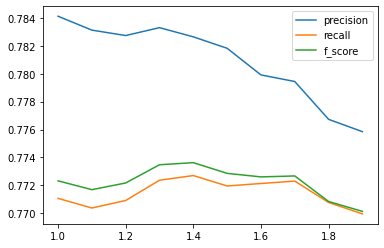

In [18]:
result_tokens.T.plot()

# 3.5 using lemmatized data

In [19]:
result = pd.DataFrame()
X = data_lemmatized['lemmatized_data']
y = data_lemmatized['label']
nb = Naive_Bayes()
X_train, y_train, X_test, y_test = nb.prepare_dataset(X,y,3,42,True)
scores = np.array([])
for coef in range(0,10):  
    scores = []
    for i in range(len(X_train)):
        y_pred = pd.DataFrame()
        X_train[i] = pd.DataFrame(X_train[i])
        y_train[i] = pd.DataFrame(y_train[i])
        X_test[i] = pd.DataFrame(X_test[i])
        y_test[i] = pd.DataFrame(y_test[i])
        X_train[i]['label'] = y_train[i]
        classes = nb.separate(X_train[i])
        data = nb.make_ready_for_nb(classes,'lemmatized_data')
        nb.classes = data.multiply(coef/10+1)
        y_pred['label'] = X_test[i]['lemmatized_data'].apply(nb.find_label)
        scores.append(list(nb.compute_score( y_pred, y_test[i], loss_fn = 'prf')))
    scores = pd.DataFrame(scores)
    scores = scores.fillna(0)
    scores = scores.sum(axis = 0).multiply(1.0/3.0)
    result[1+coef/10] = scores

In [20]:
result_lem = result.rename(index={0:"precision",1:"recall",2:"f_score"}).drop(index = 3)

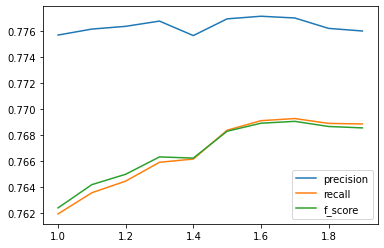

In [76]:
result_lem.T.plot()

# 3.6 test

minlen : 1 , maxlen : 19


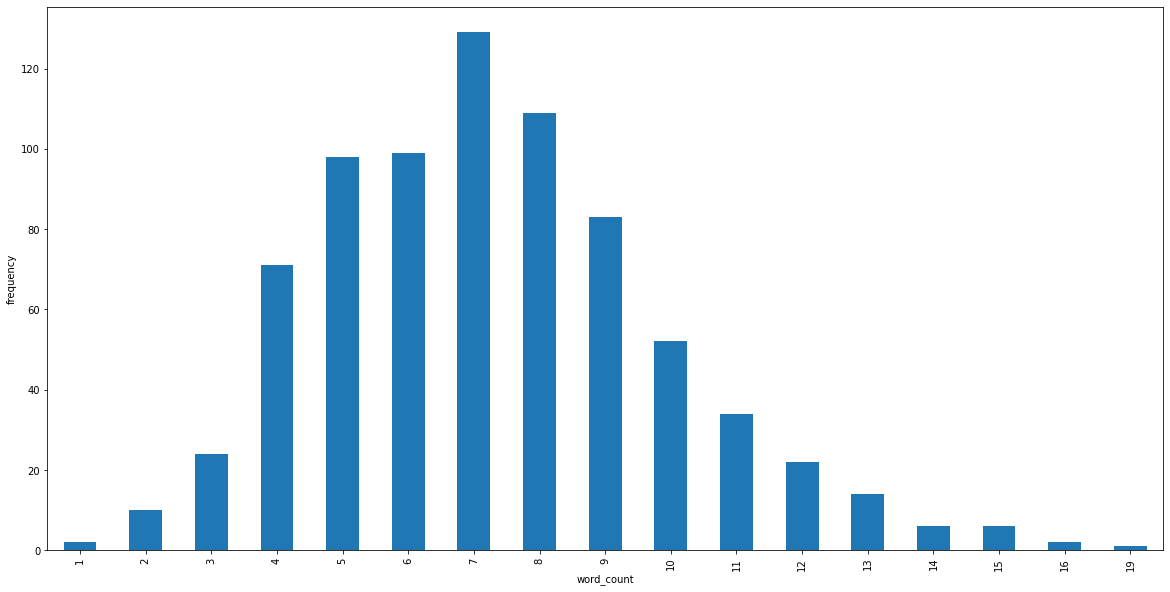

In [22]:
df = pd.read_csv('datasets/test.csv')
df.set_index('id' , inplace = True)
df = pprocess_Normalize_augment(df,drop_duplicates=False,aug=False,lem=False)


In [23]:
X = data_token['tokens']
y = data_token['label']
nb = Naive_Bayes()
X_train = pd.DataFrame(X)
y_train = pd.DataFrame(y)
scores = []
y_pred = pd.DataFrame()
X_test = pd.DataFrame(df['tokens'])
X_train['label'] = y_train
classes = nb.separate(X_train)
data = nb.make_ready_for_nb(classes)
nb.classes = data.multiply(1.3).add(1)
y_pred['label'] = X_test['tokens'].apply(nb.find_label)

y_pred


,label
id,
0,4
1,1
2,4
3,2
4,2
...,...
757,5
758,2
759,1


In [24]:
y_pred.to_csv('predict.csv')

# 3.7 Using tokens and augmented data and augmenting with multiply

In [25]:
X = data_token[['tokens','augmented_data_tokens']]
y = data_token['label']
nb = Naive_Bayes()
X_train, y_train, X_test, y_test = nb.prepare_dataset(X,y,3,42,True)
result = pd.DataFrame()
scores = []
for coef in range(0,10):  
    scores = []
    for i in range(len(X_train)):
        y_pred = pd.DataFrame()
        X_train[i] = pd.DataFrame(X_train[i])
        y_train[i] = pd.DataFrame(y_train[i])
        X_test[i] = pd.DataFrame(X_test[i])
        y_test[i] = pd.DataFrame(y_test[i])
        X_train[i]['label'] = y_train[i]
        classes = nb.separate(X_train[i])
        data = nb.make_ready_for_nb(classes)
        data1 = nb.make_ready_for_nb(classes,col = 'augmented_data_tokens')
        nb.classes = data.add(data1, fill_value=0).multiply(1+coef/10)
        y_pred['label'] = X_test[i]['tokens'].apply(nb.find_label)
        y_pred['label_aug'] = X_test[i]['augmented_data_tokens'].apply(nb.find_label)
        scores.append(list(nb.compute_score( y_pred['label'], y_test[i], loss_fn = 'prf')))
        scores.append(list(nb.compute_score( y_pred['label_aug'], y_test[i], loss_fn = 'prf')))
        
    
    scores = pd.DataFrame(scores)
    scores = scores.fillna(0)
    scores = scores.sum(axis = 0).multiply(1.0/6.0)
    result[1+coef/10] = scores
    

In [26]:
result_aug_tokens = result.rename(index={0:"precision",1:"recall",2:"f_score"}).drop(index = 3)

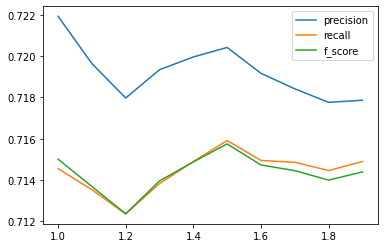

In [27]:
result_aug_tokens.T.plot()

# 4. svm

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hazm
from ast import literal_eval

In [48]:
np.random.seed(500)

# 4.1 import data

In [50]:
df = pd.read_csv('/content/train_processed_df.csv')
df.set_index('id' , inplace = True)
df['tokens'] = df['tokens'].apply(literal_eval)
df['augmented_data_tokens'] = df['augmented_data'].apply(hazm.word_tokenize)
df.head(20)

,query,label,word_count,cleaned_query,augmented_data,tokens,lemmatized_data,augmented_data_tokens
id,,,,,,,,
0,شرایط حذف ترم چیه؟,1,5.0,شرایط حذف ترم چیه,امتحانات پیش ترم چیه,"[شرایط, حذف, ترم, چیه]","['شرایط', 'حذف', 'تر', 'چیه']","[امتحانات, پیش, ترم, چیه]"
1,از کجا می تونم با دکتر وحیدی ارتباط برقرار کنم؟,2,11.0,از کجا می‌تونم با دکتر وحیدی ارتباط برقرار کنم,از اونا میتونم با صدای وحیدی ارتباط برقرار کردن,"[کجا, می‌تونم, دکتر, وحیدی, ارتباط, برقرار, کنم]","['کجا', 'می\u200cتونم', 'دکتر', 'وحید', 'ارتبا...","[از, اونا, میتونم, با, صدای, وحیدی, ارتباط, بر..."
2,بوفه برداران تا ساعت چند باز است؟,2,8.0,بوفه برداران تا ساعت چند باز است,سایه سرا تا ساعت چند بسته است,"[بوفه, برداران, ساعت, چند, باز, است]","['بوفه', 'بردار', 'ساعت', 'چند', 'باز', '#است']","[سایه, سرا, تا, ساعت, چند, بسته_است]"
3,کمترین تعداد واحد چند عدد است؟,1,7.0,کمترین تعداد واحد چند عدد است,کمترین مطلوبیت واحد چند نرخی است,"[کمترین, تعداد, واحد, چند, عدد, است]","['کمترین', 'تعداد', 'واحد', 'چند', 'عدد', '#است']","[کمترین, مطلوبیت, واحد, چند, نرخی, است]"
4,سنگ جامد است,5,3.0,سنگ جامد است,سنگ جامد نیز,"[سنگ, جامد, است]","['سنگ', 'جامد', '#است']","[سنگ, جامد, نیز]"
5,سرورای دانشکده مشکل دارن؟,3,5.0,سرورای دانشکده مشکل دارن,سرورای هم مشکل داشتند,"[سرورای, دانشکده, مشکل, دارن]","['سرورای', 'دانشکده', 'مشکل', 'دارن']","[سرورای, هم, مشکل, داشتند]"
6,کلاس آزمایشگاه فیزیک در دانشکده خودمان برگزار ...,2,12.0,کلاس آزمایشگاه فیزیک در دانشکده خودمان برگزار ...,کلاس اموزش فیزیک در شهر خودمان اداره میگردد یا...,"[کلاس, آزمایشگاه, فیزیک, دانشکده, خودمان, برگز...","['کلاس', 'آزمایشگاه', 'فیزیک', 'دانشکده', 'خود...","[کلاس, اموزش, فیزیک, در, شهر, خودمان, اداره, م..."
7,شرایط حذف پزشکی چیه؟,1,5.0,شرایط حذف پزشکی چیه,شرایط حذف ، ب,"[شرایط, حذف, پزشکی, چیه]","['شرایط', 'حذف', 'پزشک', 'چیه']","[شرایط, حذف, ،, ب]"
8,در شرایطی ساعت و روز کلاسی جابجا می شود؟,1,10.0,در شرایطی ساعت و روز کلاسی جابجا می‌شود,در نهایت ساعت و عوامل دیگر جابجا میشود,"[شرایطی, ساعت, روز, کلاسی, جابجا, می‌شود]","['شرایط', 'ساعت', 'روز', 'کلاس', 'جابجا', 'شد#...","[در, نهایت, ساعت, و, عوامل, دیگر, جابجا, میشود]"


# 4.2  3-fold cross validation with diffrent number of features tfidf

In [51]:
X = df['cleaned_query']
y = df['label']
nb = Naive_Bayes()
X_train, y_train, X_test, y_test = nb.prepare_dataset(X,y,3,42,True)

In [52]:
result = pd.DataFrame()
for num_features in range(1,50):
    scores = []
    for i in range(len(X_train)):
        Tfidf_vect = TfidfVectorizer(max_features=num_features*100)
        Tfidf_vect.fit(df['cleaned_query'])
        Train_X_Tfidf = Tfidf_vect.transform(X_train[i])
        Test_X_Tfidf = Tfidf_vect.transform(X_test[i])
        SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
        SVM.fit(Train_X_Tfidf,y_train[i])
        predictions_SVM = SVM.predict(Test_X_Tfidf)
        scores.append(list(nb.compute_score( predictions_SVM, y_test[i], loss_fn = 'prf')))
    scores = pd.DataFrame(scores)
    scores = scores.fillna(0)
    scores = scores.sum(axis = 0).multiply(1.0/3.0)
    result[num_features*100] = scores    

In [53]:
result_svm_tfidf = result.rename(index={0:"precision",1:"recall",2:"f_score"}).drop(index = 3)

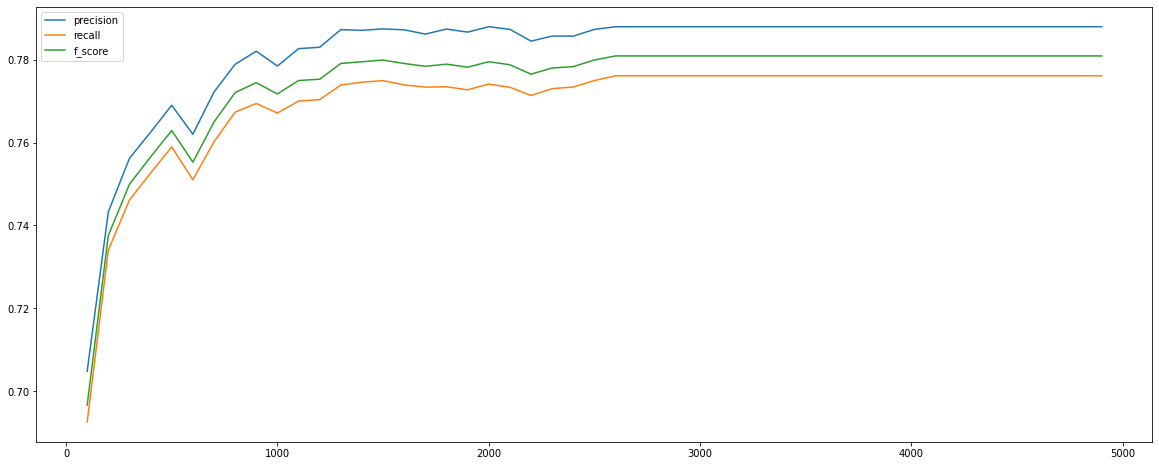

In [54]:
result_svm_tfidf.T.plot(figsize=(20,8))

# 4.3  3-fold cross validation with diffrent number of features CountVectorizer

In [55]:
X = df['cleaned_query']
y = df['label']
nb = Naive_Bayes()
X_train, y_train, X_test, y_test = nb.prepare_dataset(X,y,3,42,True)

In [56]:
result = pd.DataFrame()
for num_features in range(1,50):
    scores = []
    for i in range(len(X_train)):
        count_vect = CountVectorizer(max_features=num_features*100)
        count_vect.fit(df['cleaned_query'])
        Train_X_cvec = count_vect.transform(X_train[i])
        Test_X_cvec = count_vect.transform(X_test[i])
        SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
        SVM.fit(Train_X_cvec,y_train[i])
        predictions_SVM = SVM.predict(Test_X_cvec)
        scores.append(list(nb.compute_score( predictions_SVM, y_test[i], loss_fn = 'prf')))
    scores = pd.DataFrame(scores)
    scores = scores.fillna(0)
    scores = scores.sum(axis = 0).multiply(1.0/3.0)
    result[num_features*100] = scores    

In [57]:
result_svm_count_vec = result.rename(index={0:"precision",1:"recall",2:"f_score"}).drop(index = 3)

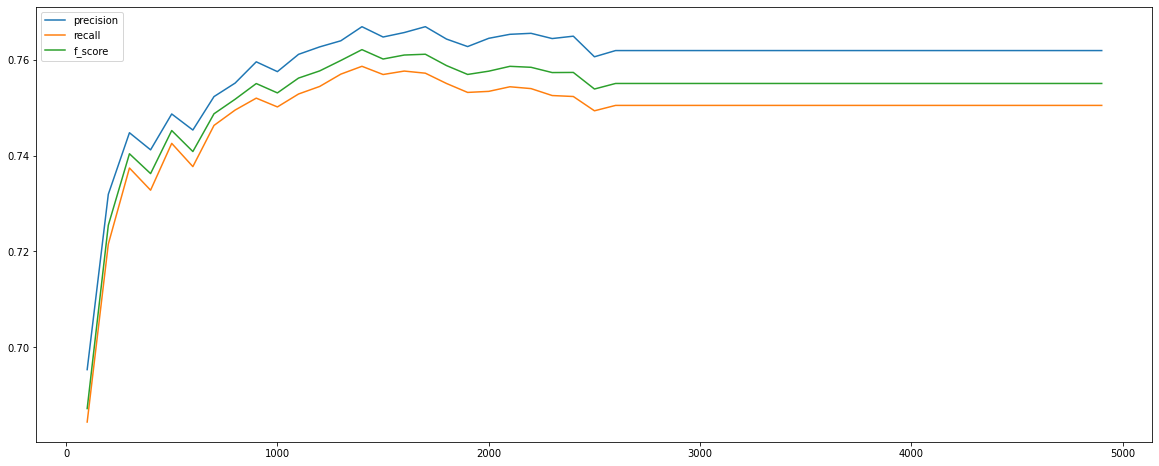

In [58]:
result_svm_count_vec.T.plot(figsize=(20,8))

# 4.4 3-fold cross validation with diffrent Cs tfidf

In [59]:
X = df['cleaned_query']
y = df['label']
nb = Naive_Bayes()
X_train, y_train, X_test, y_test = nb.prepare_dataset(X,y,3,42,True)

In [60]:
result = pd.DataFrame()
for C in range(50):
    scores = []
    for i in range(len(X_train)):
        Tfidf_vect = TfidfVectorizer(max_features=num_features*100)
        Tfidf_vect.fit(df['cleaned_query'])
        Train_X_Tfidf = Tfidf_vect.transform(X_train[i])
        Test_X_Tfidf = Tfidf_vect.transform(X_test[i])
        SVM = svm.SVC(C=(C+1)/20.0, kernel='poly', degree=1)
        SVM.fit(Train_X_Tfidf,y_train[i])
        predictions_SVM = SVM.predict(Test_X_Tfidf)
        scores.append(list(nb.compute_score( predictions_SVM, y_test[i], loss_fn = 'prf')))
    scores = pd.DataFrame(scores)
    scores = scores.fillna(0)
    scores = scores.sum(axis = 0).multiply(1.0/3.0)
    result[(C+1)/20] = scores

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


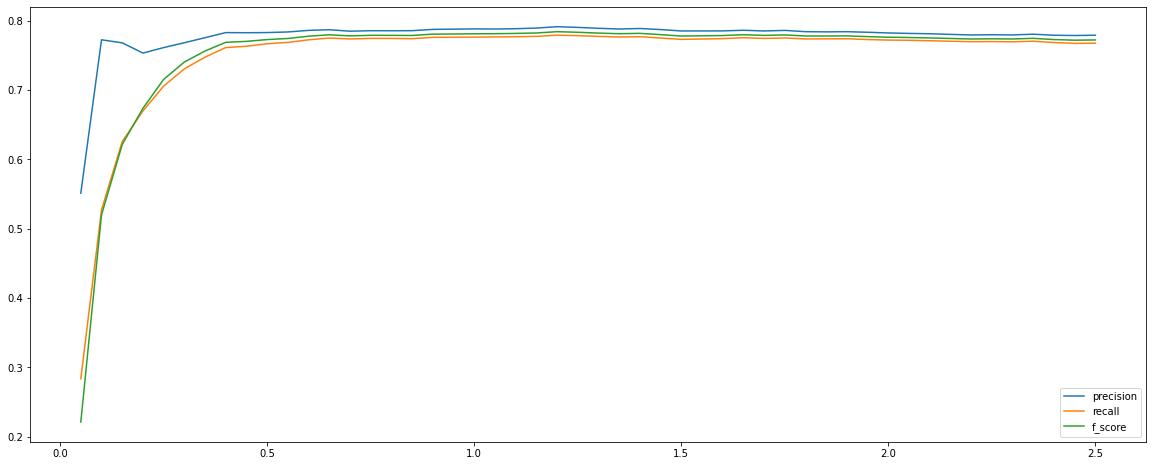

In [61]:
result_svm_tfidf_cs = result.rename(index={0:"precision",1:"recall",2:"f_score"}).drop(index = 3)
result_svm_tfidf_cs.T.plot(figsize=(20,8))

# 4.5 trying sigmoid func with diffrent Cs

In [62]:
X = df['cleaned_query']
y = df['label']
nb = Naive_Bayes()
X_train, y_train, X_test, y_test = nb.prepare_dataset(X,y,3,42,True)

In [63]:
result = pd.DataFrame()
for C in range(50):
    scores = []
    for i in range(len(X_train)):
        Tfidf_vect = TfidfVectorizer(max_features=num_features*100)
        Tfidf_vect.fit(df['cleaned_query'])
        Train_X_Tfidf = Tfidf_vect.transform(X_train[i])
        Test_X_Tfidf = Tfidf_vect.transform(X_test[i])
        SVM = svm.SVC(C=(C+1)/20.0, kernel='sigmoid', degree=1)
        SVM.fit(Train_X_Tfidf,y_train[i])
        predictions_SVM = SVM.predict(Test_X_Tfidf)
        scores.append(list(nb.compute_score( predictions_SVM, y_test[i], loss_fn = 'prf')))
    scores = pd.DataFrame(scores)
    scores = scores.fillna(0)
    scores = scores.sum(axis = 0).multiply(1.0/3.0)
    result[(C+1)/20] = scores

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


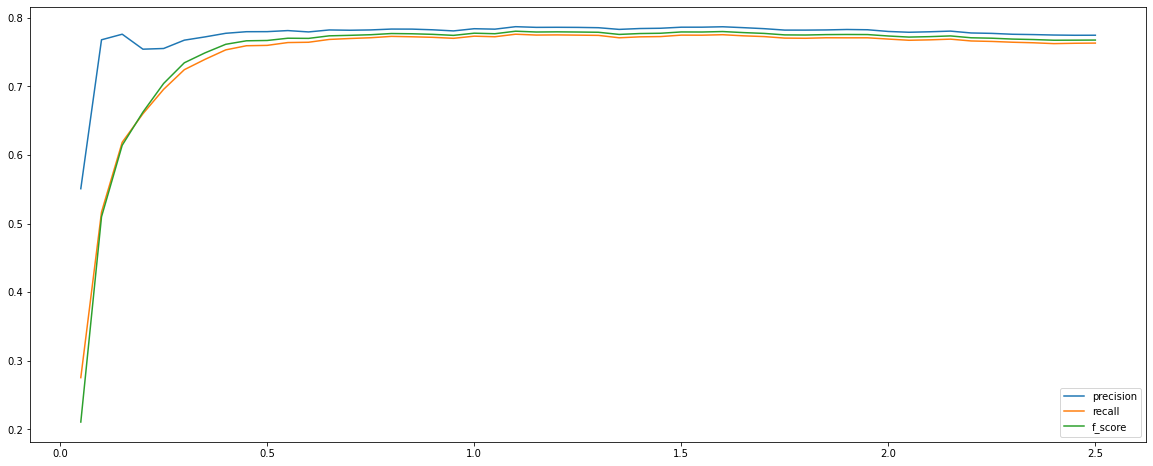

In [64]:
result_svm_sigmoid_tfidf_cs = result.rename(index={0:"precision",1:"recall",2:"f_score"}).drop(index = 3)
result_svm_sigmoid_tfidf_cs.T.plot(figsize=(20,8))

In [65]:
result_svm_sigmoid_tfidf_cs[1]

precision    0.783793
recall       0.772931
f_score      0.777269
Name: 1.0, dtype: float64

In [66]:
result_svm_tfidf[1500]

precision    0.787394
recall       0.774921
f_score      0.779877
Name: 1500, dtype: float64

# 4.6 trying rbf func

In [67]:
X = df['cleaned_query']
y = df['label']
nb = Naive_Bayes()
X_train, y_train, X_test, y_test = nb.prepare_dataset(X,y,3,42,True)

In [68]:
result = pd.DataFrame()
for gamma in ['auto','scale']:
    scores = []
    for i in range(len(X_train)):
        Tfidf_vect = TfidfVectorizer(max_features=num_features*100)
        Tfidf_vect.fit(df['cleaned_query'])
        Train_X_Tfidf = Tfidf_vect.transform(X_train[i])
        Test_X_Tfidf = Tfidf_vect.transform(X_test[i])
        SVM = svm.SVC(C=1, kernel='rbf', degree=1,gamma=gamma)
        SVM.fit(Train_X_Tfidf,y_train[i])
        predictions_SVM = SVM.predict(Test_X_Tfidf)
        scores.append(list(nb.compute_score( predictions_SVM, y_test[i], loss_fn = 'prf')))
    scores = pd.DataFrame(scores)
    scores = scores.fillna(0)
    scores = scores.sum(axis = 0).multiply(1.0/3.0)
    result[gamma] = scores

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
result_svm_rbf_tfidf_cs = result.rename(index={0:"precision",1:"recall",2:"f_score"}).drop(index = 3)

In [70]:
result_svm_rbf_tfidf_cs

,auto,scale
precision,0.054169,0.797476
recall,0.200000,0.780082
f_score,0.085243,0.786745


In [71]:
result_svm_tfidf[1500]

precision    0.787394
recall       0.774921
f_score      0.779877
Name: 1500, dtype: float64

In [77]:
result_tokens[1.4]

precision    0.782639
recall       0.772706
f_score      0.773631
Name: 1.4, dtype: float64

As you can see tfidf preforms better than CountVectorizer.

# 4.8 Conclusion

- **1**: As you can see tfidf preforms better than CountVectorizer.
- **2**: between polynomials this model preforms better with degree = 1(linear).
- **3**: best value for C is 1.
- **4**: linear preforms better than sigmoid.
- **5**: rbf with scale is slightly better than other ones.
- **6**: the raw data preforms better than hazm lemmatization.
- **7**: svm preforms slightly better than naive bayes.

# 4.9 using best feature num for test

minlen : 1 , maxlen : 19


,query,word_count,cleaned_query,tokens
id,,,,
0,چرا آخر ترم درس ها انقدر فشرده میشوند؟,9,چرا آخر ترم درس‌ها انقدر فشرده میشوند,"[چرا, آخر, ترم, درس‌ها, انقدر, فشرده, میشوند]"
1,فرجه این ترم چقدر است؟,6,فرجه این ترم چقدر است,"[فرجه, این, ترم, چقدر, است]"
2,صندلی های دانشگاه را ابری کنید!,7,صندلی‌های دانشگاه را ابری کنید,"[صندلی‌های, دانشگاه, ابری, کنید]"
3,محل تشکیل امتحان,3,محل تشکیل امتحان,"[محل, تشکیل, امتحان]"
4,دانشکده زیراکس دارد؟,4,دانشکده زیراکس دارد,"[دانشکده, زیراکس, دارد]"
...,...,...,...,...
757,آیا پنج شنبه ها دانشگاه تعطیله؟,7,آیا پنج شنبه‌ها دانشگاه تعطیله,"[آیا, پنج, شنبه‌ها, دانشگاه, تعطیله]"
758,آزمایشگاه شبکه کجاست؟,4,آزمایشگاه شبکه کجاست,"[آزمایشگاه, شبکه, کجاست]"
759,ترم تابستان از چه تاریخی آغاز میشود؟,8,ترم تابستان از چه تاریخی آغاز میشود,"[ترم, تابستان, چه, تاریخی, آغاز, میشود]"


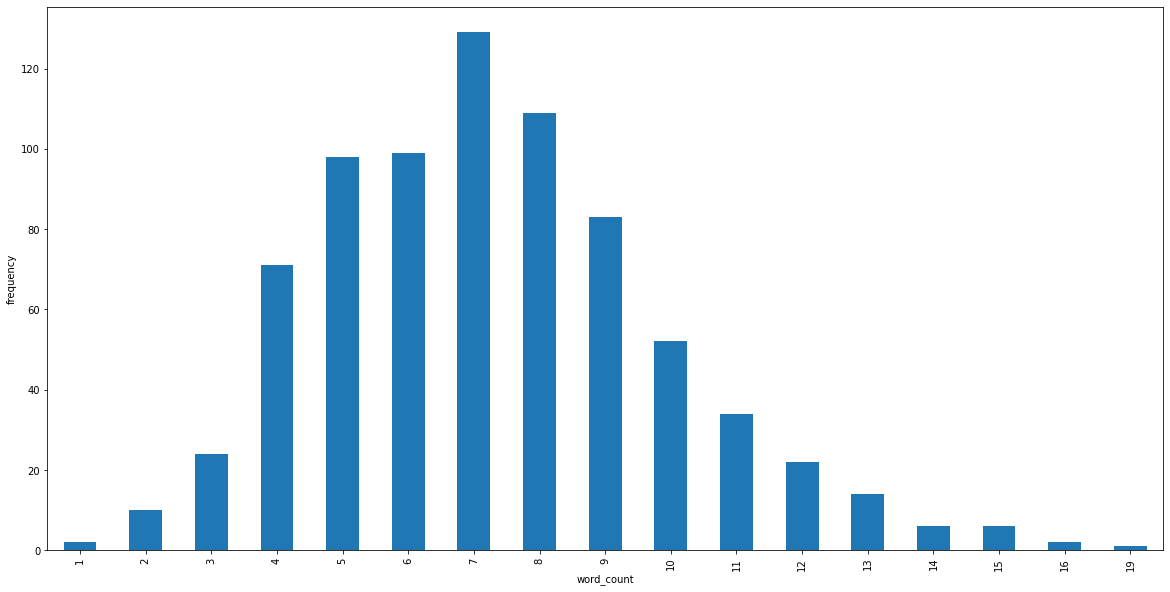

In [73]:
df1 = pd.read_csv('/content/datasets/test.csv')
df1.set_index('id' , inplace = True)
df1 = pprocess_Normalize_augment(df1,drop_duplicates=False,aug=False,lem=False)
df1

In [74]:
X = df['cleaned_query']
y = df['label']
nb = Naive_Bayes()
Tfidf_vect = TfidfVectorizer(max_features=1500)
Tfidf_vect.fit(df['cleaned_query'])
Train_X_Tfidf = Tfidf_vect.transform(X)
Test_X_Tfidf = Tfidf_vect.transform(df1['cleaned_query'])
SVM = svm.SVC(C=1.0, kernel='rbf', gamma='scale')
SVM.fit(Train_X_Tfidf,y)
predictions_SVM = SVM.predict(Test_X_Tfidf)

In [75]:
df1['label'] = predictions_SVM
pred = pd.DataFrame(df1['label'])
pred.to_csv('predict_svm.csv')